In [47]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from scipy.constants import *

from uncertainties import *
from uncertainties.unumpy import *
from uncertainties.umath import *

In [48]:
#Reading data

B_1 = pd.read_excel('data/B_1.xlsx')
B_2 = pd.read_excel('data/B_2.xlsx')
B_3 = pd.read_excel('data/B_3.xlsx')
B_4 = pd.read_excel('data/B_4.xlsx')
B_5 = pd.read_excel('data/B_5.xlsx')
B_6 = pd.read_excel('data/B_6.xlsx')
B_7 = pd.read_excel('data/B_7.xlsx')
B_8 = pd.read_excel('data/B_8.xlsx')
B_9 = pd.read_excel('data/B_9.xlsx')
B_10 = pd.read_excel('data/B_10.xlsx')
B_11 = pd.read_excel('data/B_11.xlsx')
I_B = pd.read_excel('data/I_B.xlsx')

In [49]:
# Constants and values

def uncert(data, uncert_inst):
    t_coeff = t.ppf((1 + 0.9973)/2, len(data)-1)
    return np.sqrt((np.std(data)/np.sqrt(len(data)))**2 + uncert_inst**2)*t_coeff

I_1 = 0
I_2 = 0.97
I_3 = 2.01
I_4 = 3.15
I_5 = 4.13
I_6 = 4.98
I_7 = 5.99
I_8 = 7.19
I_9 = 8.22
I_10 = 9.22
I_11 = 9.90

n = 1.456
d = 3e-3 #m

In [50]:
# Calculations 

B_1['r^2'] = B_1['r']**2

res_list = []
for i in range(len(B_1)-1):
    res = (B_1['r'][i+1]**2 - B_1['r'][i]**2)
    res_list.append(res)

In [51]:
# Linear regression for B_1

slope, intercept, r_value, p_value, std_err = stats.linregress(B_1['p'], B_1['r^2'])

B_1_alpha = ufloat(slope, std_err)
print('B_1_alpha =', B_1_alpha)

#Best fit line 
B_1_fit = slope * np.array(B_1['p']) + intercept

B_1_alpha = 0.0807+/-0.0014


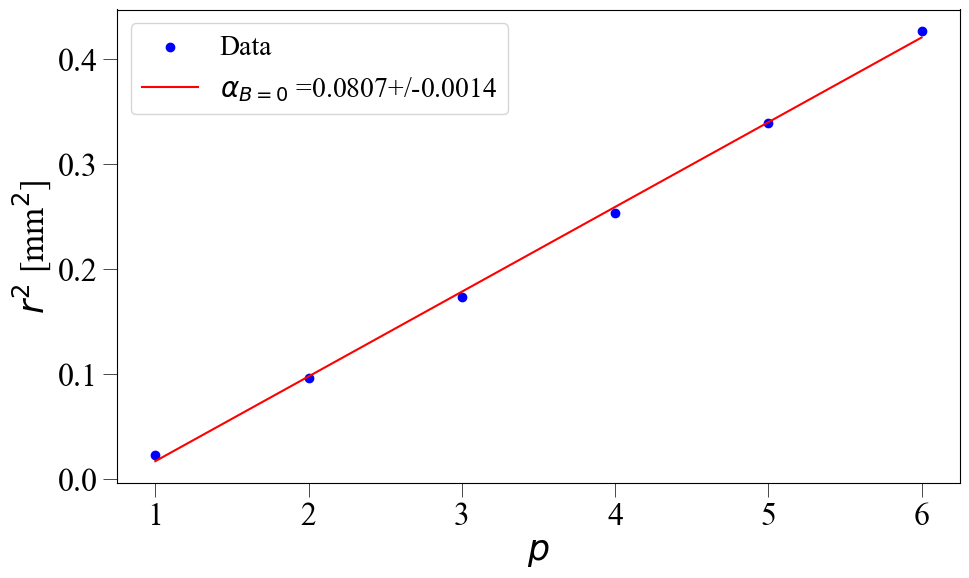

In [52]:
# Plot of delta_r(p) for B_1

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"

# Define the font size
ax_l_size = 25
l_size = 23

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel(r"$p$")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$r^2$ [mm$^2$]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(B_1['p'], B_1['r^2'], color='blue', label='Data')
ax.plot(B_1['p'], B_1_fit, color='red', label=r'$\alpha_{B=0}$ =' + f'{B_1_alpha::.4f}')

ax.legend(loc='upper left', fontsize=20)

plt.show() 

fig.savefig('images/B_1.png', bbox_inches='tight')

In [53]:
# Fit a polynomial for B(I)
I_B['B'] = I_B['B']*1e-3

coeff = np.polyfit(I_B['I'], I_B['B'], 3)
poly_B = np.poly1d(coeff)

B_x_fit = np.linspace(0, 10, 1000)
B_y_fit = poly_B(B_x_fit)

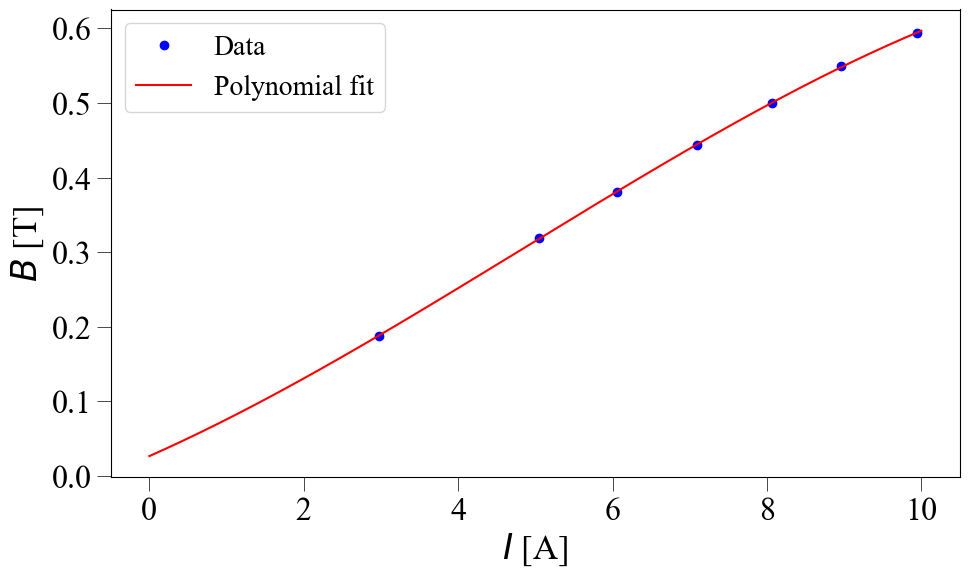

In [54]:
# Plot of B(I)

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel(r"$I$ [A]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$B$ [T]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.plot(I_B['I'], I_B['B'], 'o', color='blue', label='Data')
ax.plot(B_x_fit, B_y_fit, color='red', label='Polynomial fit')

ax.legend(loc='upper left', fontsize=20)

plt.show() 

fig.savefig('images/I_B.png', bbox_inches='tight')

In [55]:
# Defining the function for calculating mu

def B_proc_df(B, I):
    r_unc = 0.0001

    B_proc_df = {
        'p': [1, 2, 3],
        'r_a': [B['r'][0], B['r'][1], B['r'][2]],
        'r_b': [B['r'][3], B['r'][4], B['r'][5]],
        'r_c': [B['r'][6], B['r'][7], B['r'][8]],
    }

    B_proc = pd.DataFrame(B_proc_df)

    mu_ab_list = []
    for i in range(len(B_proc)-1):
        delta_r_ba = ufloat(B_proc['r_b'][i], r_unc)**2 - ufloat(B_proc['r_a'][i], r_unc)**2
        delta_r_aa = ufloat(B_proc['r_a'][i+1], r_unc)**2 - ufloat(B_proc['r_a'][i], r_unc)**2
        mu_ab = (delta_r_aa/ delta_r_ba)*((h*c)/(2*n*d*poly_B(I)))
        mu_ab_list.append(mu_ab)

    mu_bc_list = []
    for i in range(len(B_proc)-1):
        delta_r_cb = ufloat(B_proc['r_c'][i], r_unc)**2 - ufloat(B_proc['r_b'][i], r_unc)**2
        delta_r_bb = ufloat(B_proc['r_b'][i+1], r_unc)**2 - ufloat(B_proc['r_b'][i], r_unc)**2
        mu_bc = (delta_r_bb/ delta_r_cb)*((h*c)/(2*n*d*poly_B(I)))
        mu_bc_list.append(mu_bc)

    mu_list = mu_ab_list + mu_bc_list

    mu_ab_list.append(np.nan)
    mu_bc_list.append(np.nan)

    mu_ab_list = [i*1e24 for i in mu_ab_list]
    mu_bc_list = [i*1e24 for i in mu_bc_list]

    B_proc['mu_ab'] = mu_ab_list
    B_proc['mu_bc'] = mu_bc_list

    return B_proc, mu_list

In [56]:
# Calculating mu for B

B_4_proc, mu_4_list = B_proc_df(B_4, I_4)
B_5_proc, mu_5_list = B_proc_df(B_5, I_5)
B_6_proc, mu_6_list = B_proc_df(B_6, I_6)
B_7_proc, mu_7_list = B_proc_df(B_7, I_7)
B_8_proc, mu_8_list = B_proc_df(B_8, I_8)
B_9_proc, mu_9_list = B_proc_df(B_9, I_9)
B_10_proc, mu_10_list = B_proc_df(B_10, I_10)
B_11_proc, mu_11_list = B_proc_df(B_11, I_11)

mu_list = mu_4_list + mu_5_list + mu_6_list + mu_7_list + mu_8_list + mu_9_list + mu_10_list + mu_11_list

mu_mean = ufloat(np.mean(nominal_values(mu_list)), uncert(nominal_values(mu_list), np.mean(std_devs(mu_list))))

print('mu_mean =', mu_mean)

print(mu_mean*1e24-9.274)

mu_mean = (9.8+/-0.5)e-24
0.5+/-0.5


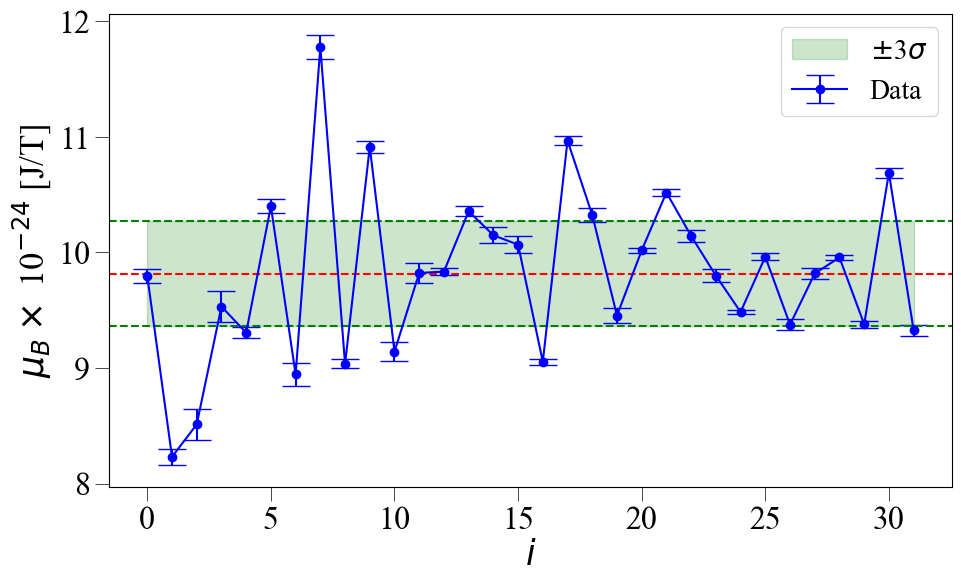

In [57]:
# Plot for mu stat

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel(r"$i$")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$\mu_B \times$ 10$^{-24}$ [J/T]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.errorbar(range(len(mu_list)), [i.nominal_value * 1e24 for i in mu_list], yerr=[i.std_dev * 1e24 for i in mu_list], fmt='-o', capsize=10, color='blue', label='Data')

ax.axhline(mu_mean.nominal_value*1e24, color='red', linestyle='--')
ax.axhline(mu_mean.nominal_value*1e24 + mu_mean.std_dev*1e24, color='green', linestyle='--')
ax.axhline(mu_mean.nominal_value*1e24 - mu_mean.std_dev*1e24, color='green', linestyle='--')
ax.fill_between(range(len(mu_list)), [(mu_mean.nominal_value + mu_mean.std_dev) * 1e24 for _ in range(len(mu_list))], [(mu_mean.nominal_value - mu_mean.std_dev) * 1e24 for _ in range(len(mu_list))], color='green', alpha=0.2, label='$\pm$3$\sigma$')

ax.legend(loc='upper right', fontsize=20)

plt.show() 

fig.savefig('images/mu.png', bbox_inches='tight')

In [58]:
I_B['B'] = I_B['B']*1e3
B_1 = B_1.round(4)
B_4_proc = B_4_proc.round(4)
B_5_proc = B_5_proc.round(4)
B_6_proc = B_6_proc.round(4)
B_7_proc = B_7_proc.round(4)
B_8_proc = B_8_proc.round(4)
B_9_proc = B_9_proc.round(4)
B_10_proc = B_10_proc.round(4)
B_11_proc = B_11_proc.round(4)

In [59]:
B_1.to_csv('data/B_1_out.csv', index=False)
I_B.to_csv('data/I_B_out.csv', index=False)
B_4_proc.to_csv('data/B_4_out.csv', index=False)
B_5_proc.to_csv('data/B_5_out.csv', index=False)
B_6_proc.to_csv('data/B_6_out.csv', index=False)
B_7_proc.to_csv('data/B_7_out.csv', index=False)
B_8_proc.to_csv('data/B_8_out.csv', index=False)
B_9_proc.to_csv('data/B_9_out.csv', index=False)
B_10_proc.to_csv('data/B_10_out.csv', index=False)
B_11_proc.to_csv('data/B_11_out.csv', index=False)